In [8]:
from __future__ import print_function
from IPython.display import display, Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
import cv2

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
%matplotlib inline

## convolução em 1D


$ \Large (f \cdot g)(t) :=  \int_{-\infty}^{\infty} f(x) \cdot g(t - x) \,dx $

https://www.youtube.com/watch?v=KuXjwB4LzSA

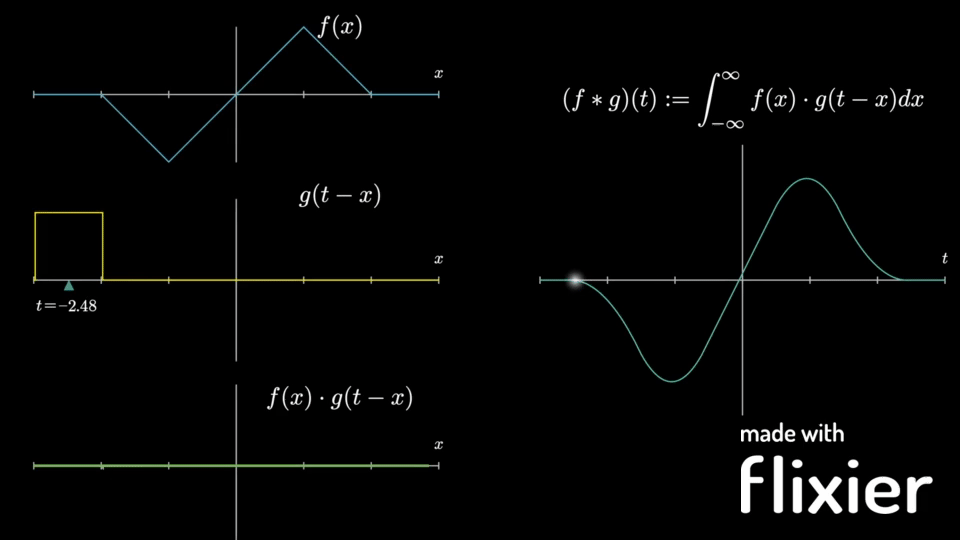

In [23]:
display(Image(filename='New Project.gif'))

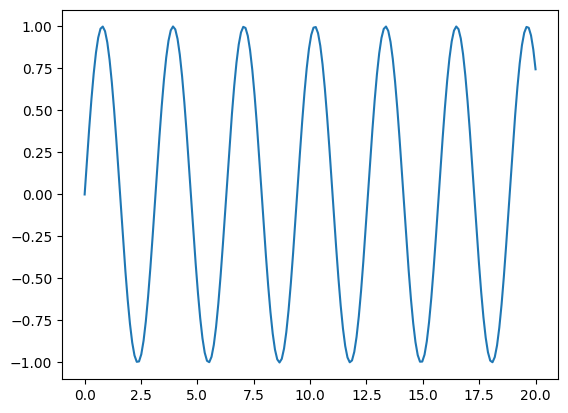

In [10]:
t = np.linspace(0, 20, 200)
y1 = np.sin(2*t)
plt.plot(t, y1)

In [11]:
def plot_conv_functions(centro):
    y2 = 1.25*stats.norm.pdf(t, centro, 0.5)
    produto = np.multiply(y1, y2).sum()
    plt.cla()
    plt.plot(t, y2)
    plt.plot(t, y1)
    plt.title(f'Produto: {produto}')
    plt.show()

In [12]:
slider = FloatSlider(value=10, min=0, max=20, step=0.1, description='Centro:')
interact(plot_conv_functions, centro=slider)

interactive(children=(FloatSlider(value=10.0, description='Centro:', max=20.0), Output()), _dom_classes=('widg…

<function __main__.plot_conv_functions(centro)>

## convolução em 2D

![Convolução 2D](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*8iUSH6G_ksbtb6Of_Ew1ZQ.gif)


In [13]:
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

In [14]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Padding nas laterais da imagem
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    np.clip(output, 0, 255)
    return output

In [15]:
!curl -o Image.jpeg https://vgg.fiit.stuba.sk/wp-uploads/2013/07/geier1.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 20  944k   20  192k    0     0  79828      0  0:00:12  0:00:02  0:00:10 79857
100  944k  100  944k    0     0   322k      0  0:00:02  0:00:02 --:--:--  322k


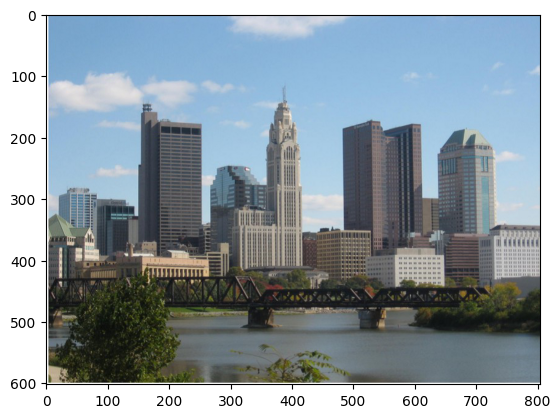

In [24]:
image =  cv2.imread('Image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [25]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

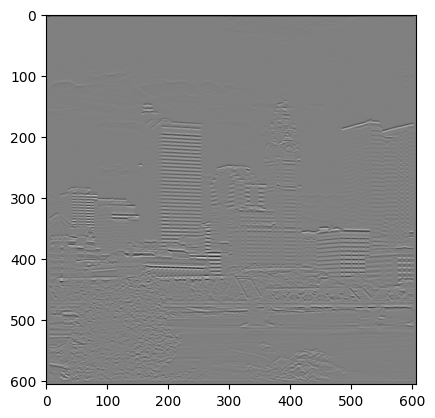

In [26]:
# Edge Detection Kernel
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Convolve and Save Output
output_horizontal = convolve2D(image, kernel, padding=2)
output_horizontal = convolve2D(output_horizontal, kernel, padding=2)
# output_horizontal = cv2.filter2D(image, -1, kernel)
plt.imshow(output_horizontal, cmap='gray')

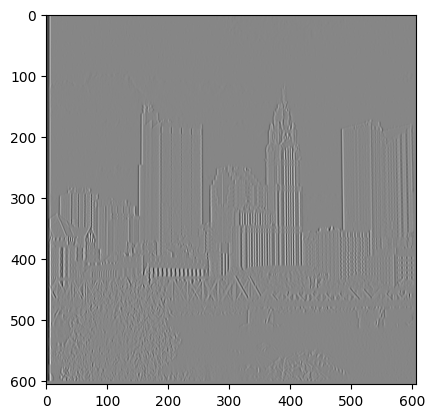

In [27]:
# Edge Detection Kernel
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Convolve and Save Output
output_vertical = convolve2D(image, kernel, padding=2)
output_vertical = convolve2D(output_vertical, kernel, padding=2)
plt.imshow(output_vertical, cmap='gray')

NameError: name 'output_horizontal' is not defined

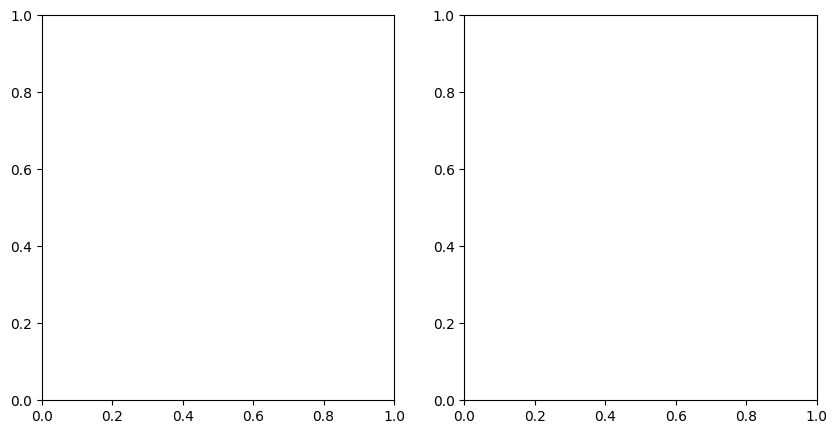

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display output_horizontal in the first subplot
axes[0].imshow(output_horizontal, cmap='gray')
axes[0].set_title('Output Horizontal')

# Display output_vertical in the second subplot
axes[1].imshow(output_vertical, cmap='gray')
axes[1].set_title('Output Vertical')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [21]:
# Edge Detection Kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Convolve and Save Output
output = convolve2D(image, kernel, padding=2)
output = convolve2D(output, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)
plt.imshow(output, cmap='gray')

NameError: name 'image' is not defined

In [22]:
# Edge Detection Kernel
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

plt.imshow(edges, cmap='gray')

NameError: name 'image' is not defined